In [19]:
import os
import re

import numpy as np
import matplotlib as mp
import scipy as sp
import scipy.stats as spt
import scipy.io as sio
import matplotlib.pyplot as plt

In [20]:
from tasks import dual2afc


## Behavior

In [21]:
path_ds = 'datasets/dual2afc_ds1/'
listSubj = next(os.walk(path_ds + 'bhv'))[1]
listSubj.sort()
iSubj = 0
subj = listSubj[iSubj]

listSess = os.listdir(os.path.join(path_ds,'bhv',subj))
listSess.sort()
iSess = 0
sessName = listSess[iSess]
fname = os.path.join(path_ds,'bhv',subj,sessName)
fname

mysess = sio.loadmat(fname, squeeze_me=True)

dataBhv = dual2afc.parser(mysess)

listSess = os.listdir(os.path.join(path_ds,'neur',subj))
listSess.sort()
iSess = 0
sessName = listSess[iSess]

## Neural

In [22]:
sessName = os.listdir(os.path.join(path_ds,'neur',subj))
sessName = sessName[0]
sessName

'.DS_Store'

In [23]:
listNt = np.array(os.listdir(os.path.join(path_ds,'neur',subj,sessName)))
listNt = listNt[[n.startswith('ms3') for n in listNt]]
listNt
iNt = 1
nt = listNt[iNt]

NotADirectoryError: [Errno 20] Not a directory: 'datasets/dual2afc_ds1/neur/M14/.DS_Store'

### readTrodesExtractedDataFile

In [37]:
def parseFields(fieldstr):
    # Returns np.dtype from field string
    sep = re.split('\s', re.sub(r"\>\<|\>|\<", ' ', fieldstr).strip())
    # print(sep)
    typearr = []
    # Every two elmts is fieldname followed by datatype
    for i in range(0,sep.__len__(), 2):
        fieldname = sep[i]
        repeats = 1
        ftype = 'uint32'

        # Finds if a <num>* is included in datatype
        if sep[i+1].__contains__('*'):
            temptypes = re.split('\*', sep[i+1])

            # Results in the correct assignment, whether str is num*dtype or dtype*num
            ftype = temptypes[temptypes[0].isdigit()]
            repeats = int(temptypes[temptypes[1].isdigit()])
        else:
            ftype = sep[i+1]

        try:
            fieldtype = getattr(np, ftype)
        except AttributeError:
            print((ftype + " is not a valid field type.\n"))
            exit(1)
        else:
            typearr.append((str(fieldname), fieldtype, repeats))
#    return typearr
    return np.dtype(typearr)

In [7]:
pathDIO = os.path.join(path_ds,'neur',subj,sessName,'dio')

listDio = os.listdir(pathDIO)
listDio.sort()

filename = os.path.join(pathDIO,listDio[0])
filename

'datasets/dual2afc_ds1/neur/M14/M14_20171117_175330/dio/M14_20171117_175330.dio_MCU_Din1.dat'

In [38]:
with open(filename, 'rb') as f:
    # Check if first line is start of settings block
    if f.readline().decode('ascii').strip() != '<Start settings>':
        raise Exception("Settings format not supported")
    buff = ''
    c = 0.0
    fields = True
    fieldsText = {}
    for line in f:
        # Read through block of settings
        if(fields):
            line = line.decode('ascii').strip()

            # filling in fields dict
            if line != '<End settings>':
                vals = line.split(': ')
                fieldsText.update({vals[0].lower(): vals[1]})

            # End of settings block, signal end of fields
            else:
                fields = False
                dt = parseFields(fieldsText['fields'])
                fieldsText['data'] = np.zeros([1], dtype = dt)

        else:
            # Holds the data in next line
            dat = str(line)
            buff += dat
            c += float(len(dat)) / float(dt.itemsize)
            # data = np.frombuffer(buffer=dat, dtype=dt, count=c)
            # merged = np.concatenate([fieldsText['data'], data])
            # fieldsText.update({'data': merged})

    # Reads rest of file at once, using dtype format generated by parseFields()
    # dt = parseFields(fieldsText['fields'])
    data = np.frombuffer(buffer=buff, dtype=dt, count=int(round(c)))
    fieldsText.update({'data': data})
    # fieldsText.update({'data': np.delete(fieldsText['data'], 0, axis = 0)})
    print(fieldsText)

AttributeError: 'str' object has no attribute '__buffer__'

In [18]:
x1 = fieldsText['fields']
x2 = parseFields(x1)
x3 = np.dtype(x2)

In [30]:
x2

[('time', numpy.uint32, 1), ('state', numpy.uint8, 1)]

In [32]:
np.dtype([('time', np.uint32, 1), ('state', np.uint8, 1)])

dtype([('time', '<u4'), ('state', 'u1')])

In [27]:
buff += dat

TypeError: must be str, not bytes

### numpy read dat (not Trodes)

In [ ]:
pathDIO = os.path.join(path_ds,'neur',subj,sessName,'dio')

listDio = os.listdir(pathDIO)
listDio.sort()

filename = os.path.join(pathDIO,listDio[0])
filename

In [12]:
mock_np = np.dtype([('time', <class 'numpy.uint32'>, 1), ('state', <class 'numpy.uint8'>, 1)])

SyntaxError: invalid syntax (<ipython-input-12-719576109e5a>, line 1)

In [ ]:
x = np.fromfile(filename)
print(filename)
x.shape

In [ ]:
x

### Read spike data

In [ ]:
fs = 30000
#mdaFirings = readmda(os.path.join(path_ds,'neur',subj,sessName,nt,'firings.mda'))
mdaCurated = readmda(os.path.join(path_ds,'neur',subj,sessName,nt,'firings.curated.mda'))
#mdaTs = readmda(os.path.join(path_ds,'neur',subj,sessName,sessName + '.timestamps.mda'))

In [ ]:
chan = mdaCurated[0,:]
samples = mdaCurated[1,:]
clust = mdaCurated[2,:]
spikes = samples/fs*1000000

In [ ]:
spt.describe(samples)
plt.hist(samples)
samples

In [ ]:
set(clust)

In [ ]:
iUnit = 31
ndxClust = clust == iUnit
ts.shape

In [ ]:
xSamp = np.ravel(samples[ndxClust])

ndx = np.array([samples[ndxClust]],dtype=int)

xTs = np.ravel(ts[ndx])

In [ ]:
x = (xSamp[0:10] - xSamp[0])/fs
y = (xTs[0:10]-xTs[0])/1000
plt.scatter(x,y)

In [ ]:
plt.subplot(131)
plt.scatter(xSamp,xTs)

In [ ]:
plt.subplot(132)
plt.hist(xSamp)

In [ ]:
plt.subplot(133)
plt.hist(xTs)

### Read sync pulses

In [ ]:
os.path.join(path_ds,'neur',subj,sessName,'dio',sessName + '.dio_MCU_Din1.dat')

In [ ]:
for i in range(1,7):
    x = np.fromfile(os.path.join(path_ds,'neur',subj,sessName,'dio',sessName + '.dio_MCU_Din' + str(i) + '.dat'))
    plt.plot(x)

In [ ]:
x.shape

In [ ]:
tsSync = np.fromfile(os.path.join(path_ds,'neur',subj,sessName,'dio',sessName + '.dio_MCU_Din1.dat'))
plt.plot(tsSync)

In [ ]:
plt.subplot(131), plt.hist(x[0,:])
plt.subplot(132), plt.hist(x[1,:])
plt.subplot(133), plt.hist(x[2,:])

In [ ]:
z = x[0,:]
plt.scatter(range(len(z)),z)

In [ ]:
x.shape
hf, ha = plt.subplots(1,np.ma.size(x,2),figsize=(15,9))
for i in range(np.ma.size(x,2)):
    y = x[:,:,i]
    ha[i].plot(np.mean(y,0),color='xkcd:green',alpha=.2)
    
plt.tight_layout()

In [ ]:
np.mean(y,0)

In [ ]:
np.ma.shape(x)
y = x[:,:,0]
y.shape

In [36]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Mar 12 2018, 20:05:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [44]:
conv = spt.norm.pdf(np.linspace(-10,10,21),0,5)
conv = conv/sum(conv)
conv = 'Nona'

In [46]:
if (type(conv)!=str) or (conv != 'None'):
    print('not none')

not none


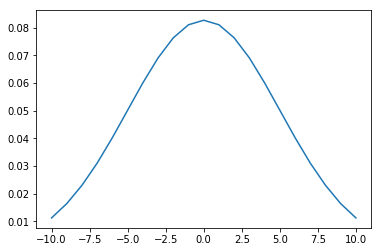

In [42]:
plt.plot(x,conv)

In [29]:
sum(conv)

1.0